Question 1

In [ ]:
from sympy import *
import matplotlib.pyplot as plt
from sympy.plotting import plot
import math
import numpy as np

In [ ]:
x = symbols('x')
expr = sin(x**2)
expr_der = Derivative(expr,x).doit()
print(expr_der)
print(expr_der.subs(x, pow(math.pi/2+, 1/2)))

2*x*cos(x**2)
7.10069999593309e-16


In [ ]:
print(type(expr_der))

<class 'sympy.core.mul.Mul'>


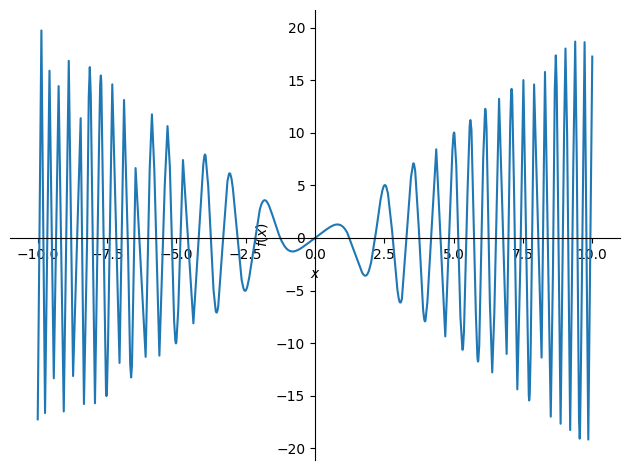

In [ ]:
p1 = plot(expr_der, show=False)
# p1.show()

In [ ]:
def forward_diff(x, h):
  return (math.sin((x+h)**2)-math.sin(x**2))/h

In [ ]:
def backward_diff(x, h):
  return (math.sin((x)**2)-math.sin((x-h)**2))/h

In [ ]:
def central_diff(x, h):
  return (math.sin((x+h)**2)-math.sin((x-h)**2))/(2*h)

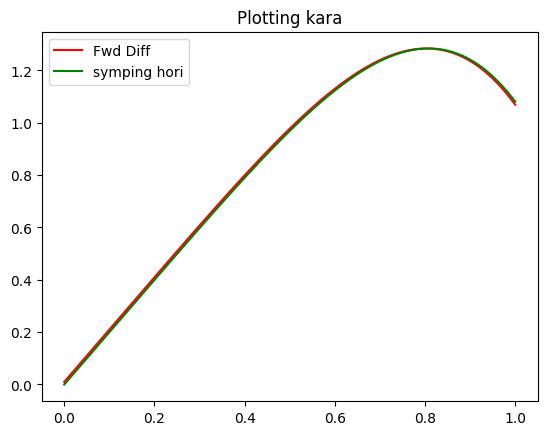

In [ ]:
x_pts = np.linspace(0, 1, num=1000)
y_pts1 = [forward_diff(x_pt, 0.01) for x_pt in x_pts]
y_pts2 = [expr_der.subs(x, x_pt) for x_pt in x_pts]
p2 = plt.plot(x_pts, y_pts1, color="red", label="Fwd Diff")
p3 = plt.plot(x_pts, y_pts2, color="green", label="symping hori")
plt.title("Plotting kara")
plt.legend()
plt.show()
# print(type(p2))
# p1.append(p2)

Question 2

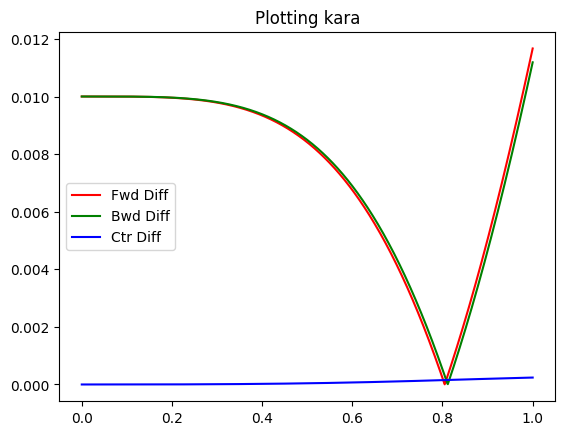

In [ ]:
y_pts1 = [abs(forward_diff(x_pt, 0.01)-expr_der.subs(x, x_pt)) for x_pt in x_pts]
y_pts2 = [abs(backward_diff(x_pt, 0.01)-expr_der.subs(x, x_pt)) for x_pt in x_pts]
y_pts3 = [abs(central_diff(x_pt, 0.01)-expr_der.subs(x, x_pt)) for x_pt in x_pts]
plt.plot(x_pts, y_pts1, color="red", label="Fwd Diff")
plt.plot(x_pts, y_pts2, color="green", label="Bwd Diff")
plt.plot(x_pts, y_pts3, color="blue", label="Ctr Diff")
plt.title("Plotting kara")
plt.legend()
plt.show()

Question 3

Question 4

In [ ]:
def integral(m):
  x_pts = np.linspace(1, 3, num=m)
  y_pts = [2*x*pow(math.e, x**2) for x in x_pts]
  area = 0
  for i in range(1, len(x_pts)):
    area += min(y_pts[i], y_pts[i-1])*(x_pts[i]-x_pts[i-1])
    area += (1/2)*(x_pts[i]-x_pts[i-1])*(abs(y_pts[i]-y_pts[i-1]))
  return area

8141.3690668931695


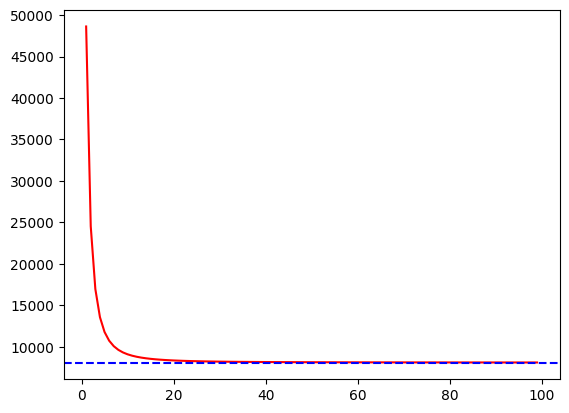

In [ ]:
actual_area = 8100.36
val = 100
m_val = []
for m in range(1, val):
  m_val.append(integral(m+1))
  if m==50:
    print(m_val[-1])
plt.plot(range(1, val), m_val, color="red")
plt.axhline(y = actual_area, color = 'blue', linestyle = '--')

Question 5

In [ ]:
#Rao vala

Question 6

In [ ]:
from scipy.integrate import quad

In [ ]:
def integrand(vec):
  ans = vec[0]
  for i in range(1, len(vec)):
    ans += vec[i]*x**i
  return ans

In [ ]:
class RowVectorFloat():
  def __init__(self, vec):
    self.vec = vec
  def __str__(self):
    out_str = ""
    for i in self.vec:
      out_str += f"{i} "
    return out_str
  def __len__(self):
    return len(self.vec)
  def __getitem__(self, ind):
    return self.vec[ind]
  def __setitem__(self, key, newvalue):
    self.vec[key] = newvalue
  def __rmul__(self, const):
    if type(const) is int or type(const) is float:
      out_list = RowVectorFloat(self)
      for i in range(len(self)):
        out_list[i] *= const
      return out_list
    else:
      return self.__mul__(const, self)

  def __mul__(self, const):
    if type(const) is int or type(const) is float:
      out_list = RowVectorFloat(self)
      for i in range(len(self)):
        out_list[i] *= const
      return out_list
    else:
      return self.__mul__(const, self)

  def __add__(self, other):
    if len(self) != len(other):
      raise Exception('Lists of different dimensions cannot be added')
      return ['lawda']
    else:
      out_list = RowVectorFloat(self)
      for i in range(len(self)):
        out_list[i] += other.__getitem__(i)
      return out_list


class Polynomial(RowVectorFloat):
  def __str__(self):
    out_str = "Coefficients of the polynomial are:\n"
    for i in range(len(self)):
      out_str += f"{self.vec[i]} "
    return out_str

  def __add__(self, other): #didnt add adding of 2 polynomials
    if len(self) >= len(other):
      out_list = Polynomial(self.vec)
      for i in range(len(other)):
        out_list.vec[i] += other.vec[i]
      return out_list
    else:
      return other.__add__(self)

  def __mul__(self, const):  #didnt add multiplying of 2 polynomials
    if type(const) is int or type(const) is float:
      out_list = Polynomial(self.vec)
      for i in range(len(self)):
        out_list.vec[i] *= const
      return out_list
    else:
      out_list = Polynomial([0]*(len(self)+len(const)))
      for i in range(len(self)):
        for j in range(len(const)):
          out_list.vec[i+j] += self.vec[i]*const.vec[j]
      return out_list

  def __rmul__(self, const):  #didnt add multiplying of 2 polynomials
    if type(const) is int or type(const) is float:
      out_list = Polynomial(self.vec)
      for i in range(len(self)):
        out_list.vec[i] *= const
      return out_list
    else:
      out_list = Polynomial([0]*(len(self)+len(const)))
      for i in range(len(self)):
        for j in range(len(const)):
          out_list.vec[i+j] += self.vec[i]*const.vec[j]
      return out_list

  def __sub__(self, other):
    if len(self) != len(other):
      raise Exception('Lists of different dimensions cannot be subbed')
      return ['Uhoh']
    else:
      return self.__add__(other*(-1))


  def __getitem__(self, pt):
    ans = 0
    for i in range(len(self)):
      ans += self.vec[i]*(pow(pt, i))
    return ans

  def show(self, a, b):
    steps = np.arange(a, b, (b-a)/100)
    y = [self[i] for i in steps]
    plt.plot(steps, y, color='r')
    plt.show()

  def fitViaMatrixMethod(self, pts):
    b = [pt[1] for pt in pts]
    x_pts = [pt[0] for pt in pts]
    a = []
    for i in range(len(pts)):
      curr_temp =[]
      for j in range(len(pts)):
        curr_temp.append(x_pts[i]**j)
      a.append(curr_temp)
    x = np.linalg.solve(a, b)
    new_poly = []
    for ele in x:
      new_poly.append(ele)
    new_p = Polynomial(new_poly)
    self.vec = new_p.vec
    new_p.show(min(x_pts)-1, max(x_pts)+1)
    # a_new = min(x_pts)-1
    # b_new = max(x_pts)+1
    # steps = np.arange(a_new, b_new, (b_new-a_new)/100)
    # y = [self[i] for i in steps]
    # plt.plot(steps, y, color='r')
    # plt.show()

  def fitViaLagrangePoly(self, pts):
    list_of_poly = []
    x_pts = [pt[0] for pt in pts]
    for j in range(len(pts)):
      temp_list = Polynomial([1]*len(pts))
      for i in range(len(pts)):
        if i!=j:
          temp_list*(Polynomial([-pts[i][0]/(pts[j][0]-pts[i][0]), -1/(pts[j][0]-pts[i][0])]))
    list_of_poly.append(temp_list)
    final_poly = Polynomial([0]*len(pts))
    self.vec = final_poly.vec
    for i in range(len(list_of_poly)):
      final_poly += pts[i][1]*(list_of_poly[i])
    final_poly.show(min(x_pts)-1, max(x_pts)+1)

  def derivative(self):
    new_vec = []
    for i in range(1,len(self.vec)):
      new_vec.append(self.vec[i]*i)
    return Polynomial(new_vec)

  def area(self,a,b):
    ans=0;
    for i in range(len(self.vec)):
      ans+=(self.vec[i]/(i+1))*(pow(b,i+1)-pow(a,i+1))
    print(f"Area in the interval [{a},{b}] : {ans}")

In [ ]:
p = Polynomial([1, 2, 3])
pd = p.derivative()
print(pd)

Coefficients of the polynomial are:
2 6 


In [ ]:
p = Polynomial([1, 2, 3])
p.area(1,2)

Area in the interval [1,2] : 11.0


Question 7